<a href="https://colab.research.google.com/github/restiso7788/Linear_Regression_CellBox/blob/main/LR_Random_partition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import os
import ast 
from matplotlib.lines import Line2D
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
root = os.getcwd()
df = pd.read_csv(root+'/../data/expert.csv')
df.head()

,4EBP1pS65,RbpS807,MAPKpT202,MEKpS217,S6,PAI-1,AKTpS473,AMPKpT172,b-Catenin,BIM,...,aHDAC,aMDM2,aJAK,aBRAFm,aPKC,aSTAT3,amTOR,aPI3K,aCDK4,aSRC
0,-0.435,-0.608,-0.855,-0.712,-0.113,-0.089,0.096,0.291,0.428,0.375,...,0.00,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.308,-0.322,-0.999,-0.594,0.022,-0.061,0.093,0.222,0.255,0.645,...,-0.89,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.402,-0.549,-0.837,-0.675,-0.011,-0.103,0.089,0.418,0.276,0.439,...,0.00,-0.393,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.475,-0.652,-0.935,-0.751,-0.085,-0.019,0.064,0.207,0.147,0.416,...,0.00,0.000,-0.474,0.000,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.611,-1.097,-1.234,-0.928,-0.114,-0.113,-0.002,-0.042,0.277,0.732,...,0.00,0.000,0.000,-0.552,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
"""
repreat the process 1000 times,Ys are the first 87 columns, Xs are the last 12 columns, 
Split training and testing by 70% and 30%
everytime, assign the X_test index to y_hat in order to store the rows used in X_test to
calcualte the average of Y_hat for each row
the final "new_df dataframe contains all rows for X_test(1000*89*30%)"
"""
new_df = pd.DataFrame()
for _ in range(1000):
  Y = df.iloc[:,:-12]
  X = df.iloc[:,-12:]
  X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.3)
  lr = LinearRegression().fit(X_train, Y_train)
  y_hat = lr.predict(X_test)
  y_hat = pd.DataFrame(y_hat)
  #df = df.reindex(np.random.permutation(df.index))
  y_hat.index = X_test.index
  new_df = pd.concat([new_df, y_hat],axis = 0)
print(new_df.shape)

(27000, 87)


In [5]:
# calculate the average by row
df2 = new_df.groupby(new_df.index).mean()
df2.head()

,0,1,2,3,4,5,6,7,8,9,...,77,78,79,80,81,82,83,84,85,86
0,-0.320458,-0.586174,-0.776024,-0.553445,-0.044216,-0.120894,0.115147,0.038041,0.407928,0.461088,...,-0.101932,0.008679,0.137494,0.069859,0.187802,0.031489,0.451237,0.003549,0.025980,0.198163
1,-0.446525,-0.505983,-0.998611,-0.491591,-0.193900,0.057389,0.128299,0.037751,0.109310,0.575716,...,-0.122336,0.009415,0.207460,-0.055747,0.055059,-0.030054,0.365125,1.487064,-0.132271,0.302901
2,-0.450476,-0.623801,-0.875255,-0.622644,-0.176607,-0.067089,0.020777,0.023656,0.251053,0.413192,...,-0.063509,0.002179,0.079924,0.044071,0.240143,0.209670,0.385273,0.151914,0.077375,0.253053
3,-0.288783,-0.657966,-0.927226,-0.562737,-0.064116,-0.108548,0.068713,0.125055,0.232974,0.436339,...,-0.071773,-0.020528,0.096553,0.054980,0.186346,0.211741,0.426382,0.056872,0.044998,0.472455
4,-0.368759,-0.858751,-1.343752,-1.109093,-0.110990,-0.222910,0.310404,0.294165,0.418800,0.571935,...,-0.038522,0.009574,0.196639,0.075671,0.288828,-0.155109,0.683099,-0.022264,-0.002668,0.662416


Text(0, 0.5, 'Predicted response')

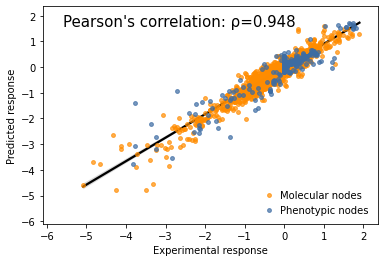

In [8]:
#only keep all Ys columns for ploting
df_y = df.iloc[:,:-12]

x_all = df_y.values.flatten()
y_all = df2.values.flatten()

x_prot = df.iloc[:,0:82]
y_prot = df2.iloc[:,0:82]
x_pheno = df.iloc[:,82:87]
y_pheno = df2.iloc[:,82:87]
plt.scatter(x_prot, y_prot, s = 15, alpha = 0.7, color="darkorange",zorder=3)
#plt.scatter(x_prot, y_prot, s = 15, alpha = 0.7, color="#FC5A5B",zorder=3)
plt.scatter(x_pheno, y_pheno, s = 15, alpha = 0.7, color="#3D6CA3",zorder=4)
#plt.scatter(x_pheno, y_pheno, s = 15, alpha = 0.7, color="#FECD7F",zorder=4)
plt.legend(["Molecular nodes","Phenotypic nodes"], loc="lower right", frameon=False,
          handletextpad=0.1)
plt.plot([-10, 10], [-10, 10], c = 'white', alpha = 0, ls = '--')
#plt.scatter(x_all, y_all, s = 15, alpha = 0.6)
sns.regplot(x_all, y_all, scatter_kws={'s': 15, 'alpha': 0},line_kws={'color': 'black', 'alpha': 1})
#sns.regplot(x_all, y_all, scatter_kws={'s': 15, 'alpha': 0},line_kws={'color': '#F18A64', 'alpha': 1})

plt.xticks(np.arange(-6,3))
plt.yticks(np.arange(-6,3))
#plt.grid(True, which='both')

lower = np.min([x_all, y_all])
upper = np.max([x_all, y_all])
plt.xlim([lower*1.2, upper*0.9])
plt.ylim([lower*1.2, upper*0.9])

r = np.corrcoef(x_all, y_all)[0][1]
plt.text(x = -5.6, y= 1.6, s='Pearson\'s correlation: ρ=%1.3f'%r,
        size = 15)
plt.xlabel('Experimental response')
plt.ylabel('Predicted response')